In [1]:
from google.colab import drive
drive.mount('./drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at ./drive


Bism  
# Imports

In [3]:
!pip install python_speech_features

  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


In [0]:
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import os

import pandas as pd

#SKLEARN
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import sklearn.metrics as sklm
from sklearn.manifold import TSNE

from python_speech_features import delta

In [0]:
train_featureDf = pd.read_pickle("./drive/My Drive/Thesis Work/monoPhoneDfCambridgeLogfBankE.pickle")
#train_featureDf['deltaC'] = train_featureDf.logfBankE.apply(delta,N = 2)
#train_featureDf['doubleDeltaC'] = train_featureDf.deltaC.apply(delta, N=2)

#remove stresses
train_featureDf.phones = [''.join([alpha for alpha in phone if alpha.isalpha()]) for phone in train_featureDf.phones]

In [76]:
train_featureDf.head()

,phones,logfBankE
0,EY,"[[-11.553039339574958, -11.62713318601026, -11..."
1,sp,"[[-16.980120121163033, -13.952385774196047, -1..."
2,sil,"[[-16.473187996012438, -14.6359224670427, -13...."
3,AH,"[[-8.260808385742848, -6.746990707037258, -8.6..."
4,B,"[[-7.607606722448552, -8.118466678578923, -7.7..."


In [77]:
train_featureDf.phones.nunique() #42 phones

42

In [94]:
#x_train = np.array((train_featureDf.logfBankE,train_featureDf.deltaC,train_featureDf.doubleDeltaC))
x_train = np.array(list(train_featureDf.logfBankE.values))
x_train.shape

(20794, 57, 26)

In [0]:
#x_train = np.transpose(x_train,[1,2,3,0])
#x_train.shape

In [0]:
for phone in set(train_featureDf.phones):
  np.save("./drive/My Drive/Thesis Work/onlyLog Phones/"+phone+".npy",x_train[train_featureDf.phones == phone])

In [98]:
!ls "./drive/My Drive/Thesis Work/onlyLog Phones/"

AA.npy	AY.npy	EH.npy	HH.npy	L.npy	OY.npy	 S.npy	  UH.npy  ZH.npy
AE.npy	B.npy	ER.npy	IH.npy	M.npy	P.npy	 spn.npy  UW.npy  Z.npy
AH.npy	CH.npy	EY.npy	IY.npy	NG.npy	R.npy	 sp.npy   V.npy
AO.npy	DH.npy	F.npy	JH.npy	N.npy	SH.npy	 TH.npy   W.npy
AW.npy	D.npy	G.npy	K.npy	OW.npy	sil.npy  T.npy	  Y.npy


# Check LogFBankEnergies

In [99]:
phones = [file[:-4] for file in os.listdir('./drive/My Drive/Thesis Work/onlyLog Phones/')]
len(phones)

42

In [0]:
phone = 'L'

### Training

#### X_TRAIN, X_TEST & Y_TEST

In [103]:
X = np.load('./drive/My Drive/Thesis Work/onlyLog Phones/'+phone+'.npy')
X = X.reshape(X.shape[0],-1)
X.shape

(1093, 1482)

90% for Train

In [0]:
np.random.shuffle(X)

In [105]:
X_train = X[:int(np.ceil(X.shape[0]*0.9))]
X_test = X[int(np.ceil(X.shape[0]*0.9)):]
y_test = np.ones(X_test.shape[0])
X_train.shape[0]+X_test.shape[0]

1093

In [106]:
y_test.shape

(109,)

In [0]:
for p in phones:
  if p != phone:
    notPhone = np.load('./drive/My Drive/Thesis Work/onlyLog Phones/'+p+'.npy')
    notPhone = notPhone.reshape(notPhone.shape[0],-1)
    np.random.shuffle(notPhone)
    X_test = np.vstack((X_test,notPhone[:int(np.ceil(y_test.shape[0]/41))]))

In [109]:
y_test = np.hstack((y_test,np.zeros(int(np.ceil(y_test.shape[0]/41)*41))))
y_test.shape

(232,)

In [110]:
y_test

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [111]:
X_test.shape

(232, 1482)

In [112]:
X_train.shape

(984, 1482)

#### Visualising the features

In [0]:
def plotTrainTestScatter(phone, phones):
  print("Phone: ",phone)
  X = np.load('./drive/My Drive/Thesis Work/Log Phones/'+phone+'.npy')
  X = X.reshape(X.shape[0],-1)
  np.random.shuffle(X)
  
  X_train = X[:int(np.ceil(X.shape[0]*0.9))]
  X_test = X[int(np.ceil(X.shape[0]*0.9)):]
  y_test = np.ones(X_test.shape[0])
  
  for p in phones:
    if p != phone:
      notPhone = np.load('./drive/My Drive/Thesis Work/Log Phones/'+p+'.npy')
      notPhone = notPhone.reshape(notPhone.shape[0],-1)
      np.random.shuffle(notPhone)
      X_test = np.vstack((X_test,notPhone[:int(np.ceil(y_test.shape[0]/41))]))
  
  y_test = np.hstack((y_test,np.zeros(int(np.ceil(y_test.shape[0]/41))*41)))

  X_test2D = TSNE(n_components=2).fit_transform(X_test)
  X_train2D = TSNE(n_components=2).fit_transform(X_train)

  print(X_train2D.shape)
  print(X_test2D.shape)

  plt.scatter(X_train2D[:, 0], X_train2D[:, 1],c='g')
  plt.scatter(X_test2D[:, 0][y_test == 0], X_test2D[:, 1][y_test == 0],c='r')
  plt.scatter(X_test2D[:, 0][y_test == 1], X_test2D[:, 1][y_test == 1],c='b')

Phone:  L
(984, 2)
(232, 2)


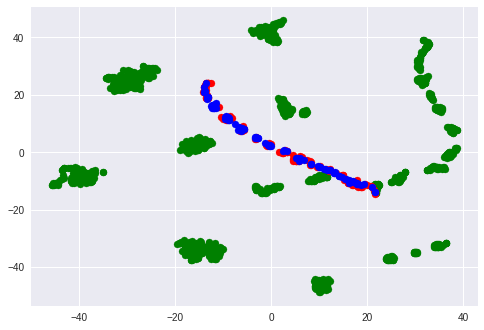

In [30]:
plotTrainTestScatter(phone,phones) #TSNE dependent on complete dataset?

#### PCA

In [113]:
X_train.shape

(984, 1482)

In [0]:
n_components = min(X_train.shape[0],X_train.shape[1])
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

<BarContainer object of 984 artists>

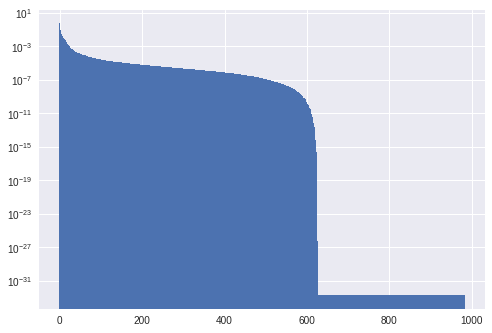

In [115]:
plt.bar(range(n_components),pca.explained_variance_ratio_,1,log=True)

In [0]:
n_components = 630
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

In [0]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#### MODEL

In [142]:
clf = svm.OneClassSVM(nu=0.05,kernel='rbf')
clf = clf.fit(X_train_pca)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
y_pred = clf.predict(X_test_pca) #pca ones here also

In [0]:
y_pred[y_pred == -1] = 0

In [145]:
print("Phone: ",phone)
print(classification_report(y_test, y_pred, target_names=['Mispronounced','Correct']))
print(confusion_matrix(y_test, y_pred, labels=range(2)))

print(sklm.roc_curve(y_test,y_pred))
print('FAR = ', sklm.roc_curve(y_test,y_pred)[0][1]*100,'%')
print('FRR = ', (1 - sklm.roc_curve(y_test,y_pred)[1][1])*100,'%')
print("AUC_SCORE = ", sklm.roc_auc_score(y_test,y_pred)*100,'%')

Phone:  L
               precision    recall  f1-score   support

Mispronounced       0.57      0.75      0.65       123
      Correct       0.57      0.38      0.45       109

    micro avg       0.57      0.57      0.57       232
    macro avg       0.57      0.56      0.55       232
 weighted avg       0.57      0.57      0.56       232

[[92 31]
 [68 41]]
(array([0.        , 0.25203252, 1.        ]), array([0.        , 0.37614679, 1.        ]), array([2, 1, 0]))
FAR =  25.203252032520325 %
FRR =  62.38532110091744 %
AUC_SCORE =  56.205713433281126 %
